In [1]:
%load_ext autoreload
%autoreload 2

# Visualise the 2 circuits for ruggedness

In [13]:
import os
import numpy as np
import seaborn as sns
from synbio_morpher.utils.data.data_format_tools.common import load_json_as_dict


In [23]:
dir_rugg = 'data/ruggedness/2025_07_01__10_26_40'

ys = np.load(os.path.join(dir_rugg, 'batch_0', 'ys.npy'))
ts = np.load(os.path.join(dir_rugg, 'batch_0', 'ts.npy'))
config = load_json_as_dict(os.path.join(dir_rugg, 'config.json'))

In [ ]:
resimulate_analytics = config.get('resimulate_analytics', False)
n_samples = 2
n_perturbs = ys.shape[0] // n_samples
idx_output = -1
ys = ys.reshape(n_samples, n_perturbs, ys.shape[-2], ys.shape[-1])

<Axes: >

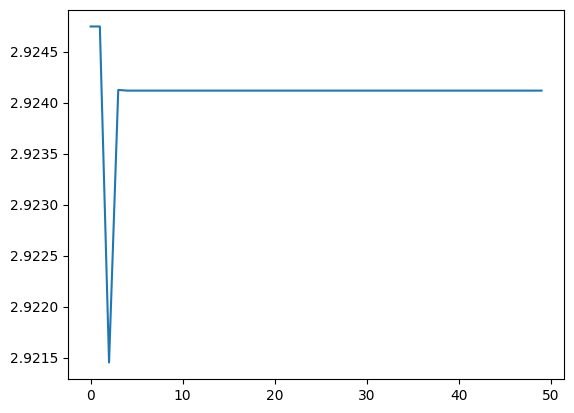

In [25]:
sns.lineplot(ys.reshape(n_perturbs, n_samples, ys.shape[-2], ys.shape[-1])[8, 0, :, -1])

In [ ]:
fig, axs = sns.subplots(n_samples, 1, figsize=(10, 5 * n_samples), sharex=True)

for i_samp in range(n_samples):
    ys_p = ys[i_samp, :, :, idx_output]
    
    for crugg in range(n_perturbs):
        ip = i + crugg
        ys_p = ys[:, :ys.shape[1]//3, idxs_output]
        ys_p = np.interp(ys_p[ip], (0, ys_p[ip].max()), (0, 1))
        # ys_p = ys_p[ip] # / ys_p[0]   # (ys_p - ys_p.min()) / (ys_p - ys_p.min()).max(),
        sns.lineplot(ys_p,
                     ax=ax, alpha=1 if crugg == 0 else 0.3,
                     linestyle=('--' if np.mod(crugg, 2) == 0 else 'dotted') if crugg > 0 else '-',
                     color='b' if crugg == 0 else 'r')
        
    ys_p = np.interp(ys_p[ip], (0, ys_p[ip].max()), (0, 1))
    
    sns.lineplot()
    
    ip = np.argsort(ts_p)
    ts = ts_p[ip]
sns.lineplot(x=ts)